<a href="https://colab.research.google.com/github/Hyebin1022/Demo/blob/main/%EC%9D%B8%ED%85%8C%EB%A6%AC%EC%96%B4%EC%82%AC%EC%A7%84%EC%97%90%EC%84%9C_%EC%83%89_%EC%B6%94%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install colorthief
import matplotlib.pyplot as plt
from colorthief import ColorThief
from collections import Counter
import numpy as np
from PIL import Image
from scipy.spatial import KDTree
import pandas as pd

In [ ]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (13.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and direc

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/통계학과 공부/Data/카페인테리어.zip'
extract_dir = '/content/카페인테리어1'

# 압축 해제 (인코딩 설정 추가)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file in zip_ref.infolist():
        file.filename = file.filename.encode('cp437').decode('euc-kr')  # 인코딩 복구
        zip_ref.extract(file, extract_dir)

print(f"압축 해제 완료: {extract_dir}")

# 압축 해제된 파일 확인
!ls -lh /content/카페인테리어1

압축 해제 완료: /content/카페인테리어1
total 1.1M
drwxr-xr-x 2 root root 1.1M Jan 10 18:13 카페인테리어


# ver 1

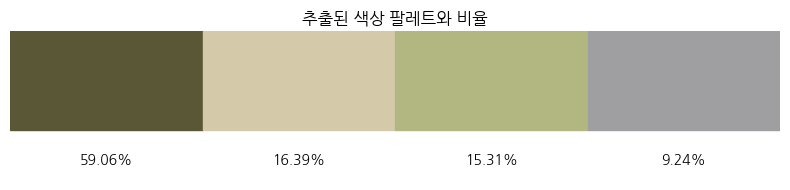

In [ ]:
import matplotlib.pyplot as plt
from colorthief import ColorThief
from collections import Counter
import numpy as np
from PIL import Image
from scipy.spatial import KDTree

# 이미지 경로
image_path = '/content/카페인테리어1/카페인테리어/더블유오앤_19662.jpg'

# ColorThief로 색상 팔레트 추출
color_thief = ColorThief(image_path)
palette = color_thief.get_palette(color_count=3)  # 상위 5개의 색상 추출

# 이미지에서 픽셀 데이터를 가져와 색상 비율 계산 (근사치 포함)
def calculate_color_ratios_with_tolerance(image_path, palette):
    image = Image.open(image_path).convert('RGB')
    pixels = np.array(image).reshape(-1, 3)

    # KDTree를 사용해 근사치를 빠르게 찾기
    tree = KDTree(palette)
    _, indices = tree.query(pixels)

    # 각 팔레트 색상의 픽셀 수를 계산
    counter = Counter(indices)
    total_pixels = len(pixels)

    # 비율 계산
    ratios = {tuple(palette[i]): count / total_pixels for i, count in counter.items()}
    return ratios

# 색상 비율 계산
color_ratios = calculate_color_ratios_with_tolerance(image_path, palette)

# 색상 비율과 팔레트를 시각화
def visualize_palette_with_ratios(palette, color_ratios):
    fig, ax = plt.subplots(1, 1, figsize=(8, 2))

    # 각 색상을 표시하면서 비율도 텍스트로 추가
    for i, color in enumerate(palette):
        ratio = color_ratios.get(tuple(color), 0)
        ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=np.array(color) / 255))
        ax.text(i + 0.5, -0.3, f"{ratio:.2%}", ha='center', va='center', fontsize=10)

    ax.set_xlim(0, len(palette))
    ax.set_ylim(-0.5, 1)
    ax.axis('off')
    ax.set_title("추출된 색상 팔레트와 비율")
    plt.tight_layout()
    plt.show()

# 시각화 함수 호출
visualize_palette_with_ratios(palette, color_ratios)


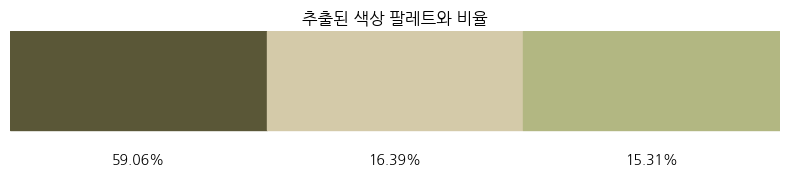

In [ ]:
# 비율 10% 이하의 색상 제외
def filter_low_ratio_colors(palette, color_ratios, threshold=0.1):
    """
    비율이 특정 값(threshold) 이하인 색상을 필터링합니다.

    Args:
        palette (list): 추출된 색상 팔레트.
        color_ratios (dict): 색상 비율 딕셔너리.
        threshold (float): 비율 필터 기준 (기본값: 0.1).

    Returns:
        filtered_palette (list): 비율 기준을 통과한 색상 팔레트.
        filtered_ratios (dict): 비율 기준을 통과한 색상 비율.
    """
    filtered_palette = []
    filtered_ratios = {}

    for color in palette:
        ratio = color_ratios.get(tuple(color), 0)
        if ratio >= threshold:
            filtered_palette.append(color)
            filtered_ratios[tuple(color)] = ratio

    return filtered_palette, filtered_ratios

# 비율 필터링 적용
filtered_palette, filtered_color_ratios = filter_low_ratio_colors(palette, color_ratios, threshold=0.1)

# 필터링된 결과 시각화
visualize_palette_with_ratios(filtered_palette, filtered_color_ratios)


# ver1 실행

In [ ]:
import os
import pandas as pd
from glob import glob
from colorthief import ColorThief
from collections import Counter
import numpy as np
from PIL import Image
from scipy.spatial import KDTree

# 이미지 폴더 경로
image_folder = '/content/카페인테리어1/카페인테리어'

# 처리하고자 하는 이미지 확장자 리스트
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']


In [ ]:
# 이미지 파일 목록 생성
image_files = []
for ext in image_extensions:
    image_files.extend(glob(os.path.join(image_folder, ext)))

In [ ]:
# 이미지에서 픽셀 데이터를 가져와 색상 비율 계산 (근사치 포함)
def calculate_color_ratios_with_tolerance(image_path, palette):
    image = Image.open(image_path).convert('RGB')
    pixels = np.array(image).reshape(-1, 3)

    # KDTree를 사용해 근사치를 빠르게 찾기
    tree = KDTree(palette)
    _, indices = tree.query(pixels)

    # 각 팔레트 색상의 픽셀 수를 계산
    counter = Counter(indices)
    total_pixels = len(pixels)

    # 비율 계산
    ratios = {tuple(palette[i]): count / total_pixels for i, count in counter.items()}
    return ratios

# 비율 10% 이하의 색상 제외
def filter_low_ratio_colors(palette, color_ratios, threshold=0.1):
    """
    비율이 특정 값(threshold) 이하인 색상을 필터링합니다.

    Args:
        palette (list): 추출된 색상 팔레트.
        color_ratios (dict): 색상 비율 딕셔너리.
        threshold (float): 비율 필터 기준 (기본값: 0.1).

    Returns:
        filtered_palette (list): 비율 기준을 통과한 색상 팔레트.
        filtered_ratios (dict): 비율 기준을 통과한 색상 비율.
    """
    filtered_palette = []
    filtered_ratios = {}

    for color in palette:
        ratio = color_ratios.get(tuple(color), 0)
        if ratio >= threshold:
            filtered_palette.append(color)
            filtered_ratios[tuple(color)] = ratio

    return filtered_palette, filtered_ratios

In [ ]:
from tqdm import tqdm

# 결과를 저장할 리스트 초기화
data = []

# tqdm을 사용하여 모든 이미지에 대해 처리
for image_path in tqdm(image_files, desc="Processing Images"):
    try:
        # ColorThief로 색상 팔레트 추출
        color_thief = ColorThief(image_path)
        palette = color_thief.get_palette(color_count=4)

        # 색상 비율 계산
        color_ratios = calculate_color_ratios_with_tolerance(image_path, palette)

        # 비율 10% 이상 필터링
        filtered_palette, filtered_color_ratios = filter_low_ratio_colors(palette, color_ratios, threshold=0.1)

        # 데이터프레임에 추가할 데이터 생성
        row = {
            "Image Name": os.path.basename(image_path),
            "Colors": filtered_palette,
            "Ratios": list(filtered_color_ratios.values()),
        }
        data.append(row)

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

Processing Images: 100%|██████████| 18996/18996 [2:16:29<00:00,  2.32it/s]


In [ ]:
# 데이터프레임 생성
df = pd.DataFrame(data)

# 데이터프레임 저장
output_path = "/content/color_analysis_results.csv"
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"색상 분석 결과가 {output_path}에 저장되었습니다.")

색상 분석 결과가 /content/color_analysis_results.csv에 저장되었습니다.


In [ ]:
# 데이터프레임 출력
print(df)

# ver 2

In [ ]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from typing import List, Tuple

In [ ]:
def get_valid_pixels(image: Image.Image, quality: int = 1) -> List[Tuple[int, int, int]]:
    """
    이미지에서 유효한 픽셀(RGB)을 추출합니다.

    Args:
        image (Image.Image): PIL 이미지 객체.
        quality (int): 처리 품질(샘플링 간격). 값이 클수록 더 적은 픽셀을 샘플링합니다.

    Returns:
        List[Tuple[int, int, int]]: 유효한 픽셀의 RGB 값 리스트.
    """
    width, height = image.size
    pixels = image.getdata()
    pixel_count = width * height
    valid_pixels = []

    # 품질(quality)에 따라 샘플링하며 유효한 픽셀 필터링
    for i in range(0, pixel_count, quality):
        r, g, b, a = pixels[i]
        # 알파 값이 125 이상이고 흰색이 아닌 경우만 유효 픽셀로 간주
        if a >= 125:
            if not (r > 250 and g > 250 and b > 250):  # 완전 흰색 제외
                valid_pixels.append((r, g, b))
    return valid_pixels


def get_unique_pixels(valid_pixels: List[Tuple[int, int, int]]) -> np.ndarray:
    """
    유효한 픽셀에서 중복을 제거하고 고유한 픽셀만 반환합니다.

    Args:
        valid_pixels (List[Tuple[int, int, int]]): 유효한 픽셀의 RGB 값 리스트.

    Returns:
        np.ndarray: 고유한 픽셀의 RGB 값 배열.
    """
    return np.unique(valid_pixels, axis=0)


def rgb_to_hex(rgb: Tuple[int, int, int]) -> str:
    """
    RGB 값을 HEX 색상 코드로 변환합니다.

    Args:
        rgb (Tuple[int, int, int]): RGB 값.

    Returns:
        str: HEX 색상 코드.
    """
    r, g, b = rgb
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)


def plot_valid_pixels(valid_pixels: List[Tuple[int, int, int]]) -> None:
    """
    유효한 픽셀을 3D RGB 공간에 시각화합니다.

    Args:
        valid_pixels (List[Tuple[int, int, int]]): 유효한 픽셀의 RGB 값 리스트.

    Returns:
        None
    """
    unique_pixels = get_unique_pixels(valid_pixels)

    # 고유 픽셀을 HEX 색상으로 변환
    hhex = list(map(rgb_to_hex, unique_pixels))

    # 3D 플롯 생성
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    x = unique_pixels[:, 0]  # R 채널
    y = unique_pixels[:, 1]  # G 채널
    z = unique_pixels[:, 2]  # B 채널

    ax.scatter(x, y, z, color=hhex)

    ax.set_xlabel('R (0~255)')
    ax.set_ylabel('G (0~255)')
    ax.set_zlabel('B (0~255)')

In [ ]:
def extract_dominant_colors(valid_pixels: List[Tuple[int, int, int]], k: int = 5) -> np.ndarray:
    """
    K-Means 클러스터링을 사용하여 주요 색상을 추출합니다.

    Args:
        valid_pixels (List[Tuple[int, int, int]]): 유효한 픽셀의 RGB 값 리스트.
        k (int): 추출할 주요 색상의 개수.

    Returns:
        np.ndarray: 주요 색상의 RGB 값 배열.
    """

    unique_pixels = get_unique_pixels(valid_pixels)

    # K-Means 클러스터링 수행
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(unique_pixels)

    # 클러스터 중심점(대표 색상) 추출
    centers = np.array(kmeans.cluster_centers_, dtype='uint8')

    return centers


def plot_dominant_colors(dominant_colors: np.ndarray) -> None:
    """
    주요 색상을 시각화합니다.

    Args:
        dominant_colors (np.ndarray): 주요 색상의 RGB 값 배열.

    Returns:
        None
    """

    print("Dominant Colors (RGB):\n", dominant_colors)

    # 시각화: 팔레트 색상 출력 (가로로 정렬)
    for i, color in enumerate(dominant_colors):
        plt.subplot(1, len(dominant_colors), i+1)
        plt.imshow([[color]])
        plt.axis('off')
        plt.title(f"Color {i+1}")

    plt.tight_layout()
    plt.show()


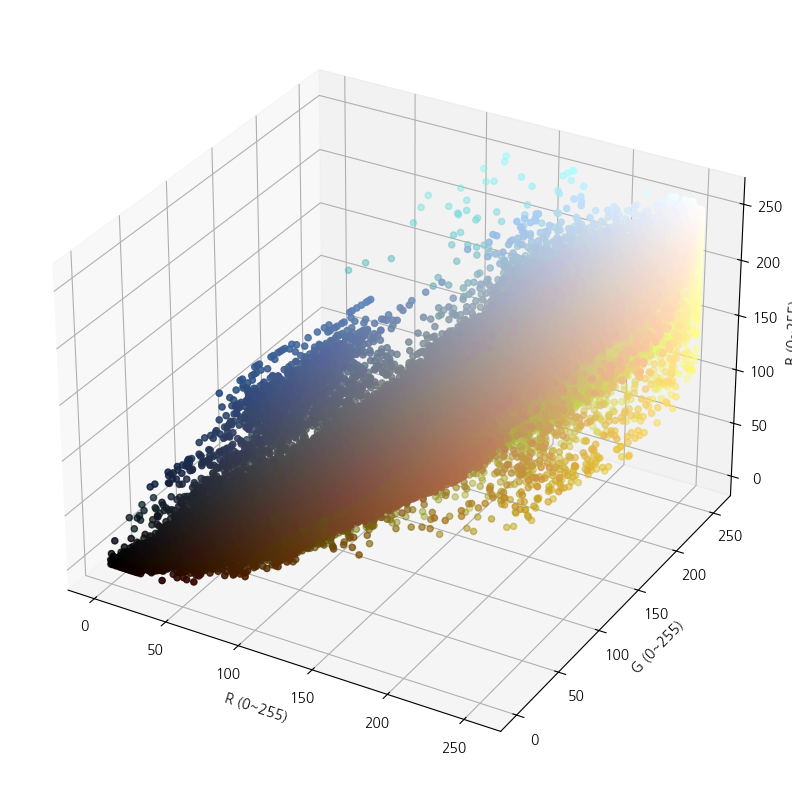

In [ ]:
path = '/content/카페인테리어1/카페인테리어/더블유오앤_19662.jpg'
image = Image.open(path)
image = image.convert("RGBA")

valid_pixels = get_valid_pixels(image)

plot_valid_pixels(valid_pixels)

Dominant Colors (RGB):
 [[115 106  73]
 [215 210 180]
 [ 55  55  23]
 [169 165 115]]


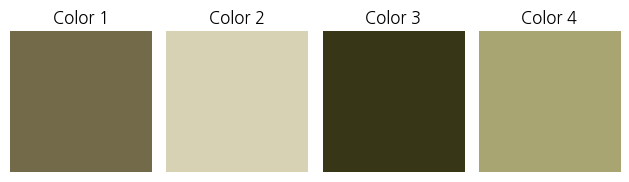

In [ ]:
dominant_colors = extract_dominant_colors(valid_pixels, k=4)
plot_dominant_colors(dominant_colors)

# 실행

In [ ]:
import os
from glob import glob
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.cluster import KMeans
from tqdm import tqdm
from typing import List, Tuple

In [ ]:
# 이미지 경로
image_folder = '/content/카페인테리어1/카페인테리어'
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']

In [ ]:
# 유효한 픽셀 추출 함수
def get_valid_pixels(image: Image.Image, quality: int = 1) -> List[Tuple[int, int, int]]:
    width, height = image.size
    pixels = image.getdata()
    pixel_count = width * height
    valid_pixels = []

    for i in range(0, pixel_count, quality):
        r, g, b, a = pixels[i]
        if a >= 125 and not (r > 250 and g > 250 and b > 250):  # 완전 흰색 제외
            valid_pixels.append((r, g, b))
    return valid_pixels

# 주요 색상 추출 함수
def extract_dominant_colors(valid_pixels: List[Tuple[int, int, int]], k: int = 4) -> List[Tuple[int, int, int]]:
    unique_pixels = np.unique(valid_pixels, axis=0)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(unique_pixels)
    centers = np.array(kmeans.cluster_centers_, dtype='uint8')
    return [tuple(color) for color in centers]

In [ ]:
# 이미지 파일 목록 생성
image_files = []
for ext in image_extensions:
    image_files.extend(glob(os.path.join(image_folder, ext)))

# 결과 저장
data = []

In [ ]:
print(f"총 {len(image_files)}개의 이미지를 처리합니다.")

for image_file in tqdm(image_files, desc="Processing Images", unit="image"):
    try:
        # 이미지 열기
        image = Image.open(image_file).convert('RGBA')
        valid_pixels = get_valid_pixels(image, quality=10)  # 품질 설정
        dominant_colors = extract_dominant_colors(valid_pixels, k=3)

        # 데이터프레임에 추가
        data.append({
            'Image': os.path.basename(image_file),
            'Color 1': dominant_colors[0],
            'Color 2': dominant_colors[1],
            'Color 3': dominant_colors[2]
        })
    except Exception as e:
        print(f"Error processing {image_file}: {e}")

# 데이터프레임 생성
df = pd.DataFrame(data)

# 결과 출력
print(df)

총 18996개의 이미지를 처리합니다.


Processing Images:  27%|██▋       | 5211/18996 [14:05<42:49,  5.37image/s]

In [ ]:
# 데이터프레임 저장 (선택)
output_path = '/content/dominant_colors.csv'
df.to_csv(output_path, index=False)
print(f"결과가 {output_path}에 저장되었습니다.")

In [ ]:
# 새로운 열에 색상 3개를 리스트로 저장
df['All Colors'] = df.apply(lambda row: [row['Color 1'], row['Color 2'], row['Color 3']], axis=1)

# 결과 확인
df.head()

In [ ]:
# Image 열과 All Colors 열만 선택
data = df[['Image', 'All Colors']]

# 카페 별로 분류

- 카페 이름 같은 친구들끼리 묶음 -> 색상을 하나의 열에 다 넣음.
- 또 그 중에서 색상을 3개를 뽑자.

In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('/content/color_analysis_results.csv')

In [ ]:
df.head()

,Image Name,Colors,Ratios
0,943_킹스크로스CAFE_12106.jpg,"[(83, 65, 51), (163, 156, 116)]","[0.6752908163265307, 0.23859948979591836]"
1,아벨롭_홍대본점_11307.jpg,"[(131, 96, 77), (213, 211, 191), (157, 170, 18...","[0.4476275510204082, 0.21359268707482992, 0.22..."
2,발코니가든_9205.jpg,"[(95, 95, 83), (218, 201, 186), (124, 170, 191)]","[0.5267020462803595, 0.15807754828839166, 0.23..."
3,하우스오브바이닐_연남점_6032.jpg,"[(79, 50, 31), (213, 165, 122)]","[0.7426938775510205, 0.18202295918367348]"
4,퐁포네뜨_9793.jpg,"[(139, 117, 95), (42, 41, 36), (225, 210, 174)...","[0.476980350963915, 0.2552860850222442, 0.1318..."


In [ ]:
# Image 열과 All Colors 열만 선택
data = df[['Image Name', 'Colors']]

In [ ]:
# 카페명 추출: 이미지 이름에서 마지막 "_" 이전까지 추출
data['Cafe Name'] = data['Image Name'].apply(lambda x: x.rsplit('_', 1)[0])

In [ ]:
data.head()

,Image Name,Colors,Cafe Name
0,943_킹스크로스CAFE_12106.jpg,"[(83, 65, 51), (163, 156, 116)]",943_킹스크로스CAFE
1,아벨롭_홍대본점_11307.jpg,"[(131, 96, 77), (213, 211, 191), (157, 170, 18...",아벨롭_홍대본점
2,발코니가든_9205.jpg,"[(95, 95, 83), (218, 201, 186), (124, 170, 191)]",발코니가든
3,하우스오브바이닐_연남점_6032.jpg,"[(79, 50, 31), (213, 165, 122)]",하우스오브바이닐_연남점
4,퐁포네뜨_9793.jpg,"[(139, 117, 95), (42, 41, 36), (225, 210, 174)...",퐁포네뜨


In [ ]:
data['Colors'] = data['Colors'].str.replace(r'[\[\]]', '', regex=True) # 대괄호 제거

In [ ]:
data.head()

,Image Name,Colors,Cafe Name
0,943_킹스크로스CAFE_12106.jpg,"(83, 65, 51), (163, 156, 116)",943_킹스크로스CAFE
1,아벨롭_홍대본점_11307.jpg,"(131, 96, 77), (213, 211, 191), (157, 170, 181...",아벨롭_홍대본점
2,발코니가든_9205.jpg,"(95, 95, 83), (218, 201, 186), (124, 170, 191)",발코니가든
3,하우스오브바이닐_연남점_6032.jpg,"(79, 50, 31), (213, 165, 122)",하우스오브바이닐_연남점
4,퐁포네뜨_9793.jpg,"(139, 117, 95), (42, 41, 36), (225, 210, 174),...",퐁포네뜨


In [ ]:
# 'Colors'를 결합해서 'Cafe Name' 별로 그룹화된 새로운 데이터프레임 생성
data['Colors'] = data['Colors'].apply(eval)  # 문자열로 저장된 튜플을 리스트로 변환

In [ ]:
# 그룹화 및 색상 합치기
merged_df = data.groupby('Cafe Name').agg({'Colors': lambda x: [color for sublist in x for color in sublist]}).reset_index()

In [ ]:
# 'Colors'를 문자열로 변환 (가독성 위해)
merged_df['Colors'] = merged_df['Colors'].apply(lambda x: ', '.join(map(str, x)))

In [ ]:
merged_df.head()

,Cafe Name,Colors
0,17도씨,"(151, 115, 90), (24, 19, 17), (224, 209, 187),..."
1,1984,"(177, 172, 168), (39, 44, 47), (86, 60, 50), (..."
2,943_킹스크로스CAFE,"(83, 65, 51), (163, 156, 116), (84, 74, 56), (..."
3,공미학_마포홍대점,"(140, 122, 113), (41, 35, 33), (184, 182, 192)..."
4,공상온도,"(107, 88, 74), (181, 186, 179), (146, 161, 184..."


In [ ]:
# 데이터프레임 저장 (선택)
output_path = '/content/dominant_colors.csv'
merged_df.to_csv(output_path, index=False)
print(f"결과가 {output_path}에 저장되었습니다.")

결과가 /content/dominant_colors.csv에 저장되었습니다.


In [ ]:
# 주요 색상과 비율 계산 함수
def calculate_color_ratios_with_tolerance(palette, colors):
    # KDTree를 사용해 근사치를 빠르게 찾기
    tree = KDTree(palette)
    _, indices = tree.query(colors)

    # 각 팔레트 색상의 픽셀 수를 계산
    counter = Counter(indices)
    total_colors = len(colors)

    # 비율 계산
    ratios = {tuple(palette[i]): count / total_colors for i, count in counter.items()}
    return ratios

# 색상 비율과 팔레트를 시각화
def visualize_palette_with_ratios(cafe_name, palette, color_ratios):
    fig, ax = plt.subplots(1, 1, figsize=(8, 2))

    # 각 색상을 표시하면서 비율도 텍스트로 추가
    for i, color in enumerate(palette):
        ratio = color_ratios.get(tuple(color), 0)
        ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=np.array(color) / 255))
        ax.text(i + 0.5, -0.3, f"{ratio:.2%}", ha='center', va='center', fontsize=10)

    ax.set_xlim(0, len(palette))
    ax.set_ylim(-0.5, 1)
    ax.axis('off')
    ax.set_title(f"{cafe_name} - 주요 색상 팔레트와 비율")
    plt.tight_layout()
    plt.show()

def process_cafes(merged_df):
    for idx, row in merged_df.iterrows():
        cafe_name = row['Cafe Name']

        # Colors 데이터를 안전하게 파싱하기 위해 정규식을 사용
        import re
        raw_colors = row['Colors']
        color_matches = re.findall(r'\(\s*\d+\s*,\s*\d+\s*,\s*\d+\s*\)', raw_colors)

        # 문자열 색상을 튜플로 변환
        colors = [tuple(map(int, re.findall(r'\d+', color))) for color in color_matches]

        # 주요 색상 추출
        palette = colors[:4] if len(colors) >= 3 else colors

        # 주요 색상 비율 계산
        color_ratios = calculate_color_ratios_with_tolerance(palette, colors)

        # 비율과 팔레트를 시각화
        visualize_palette_with_ratios(cafe_name, palette, color_ratios)


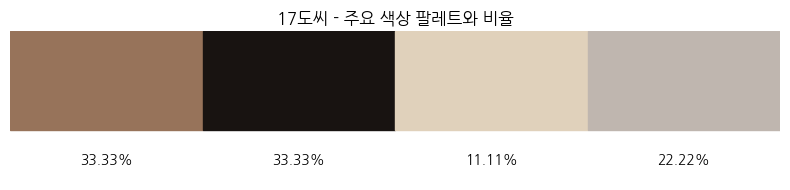

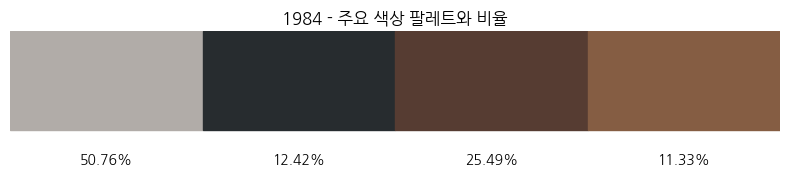

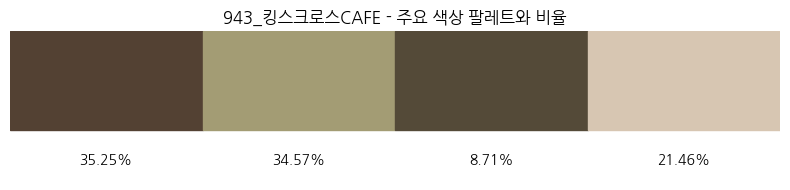

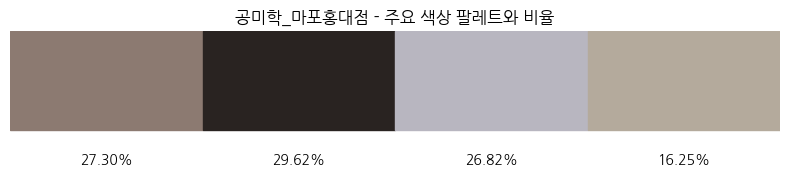

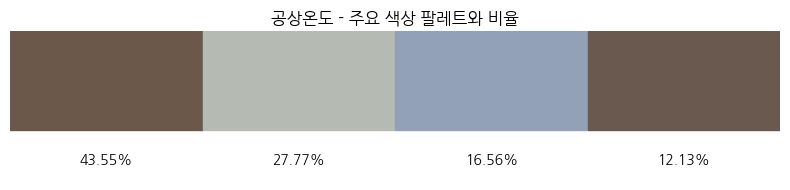

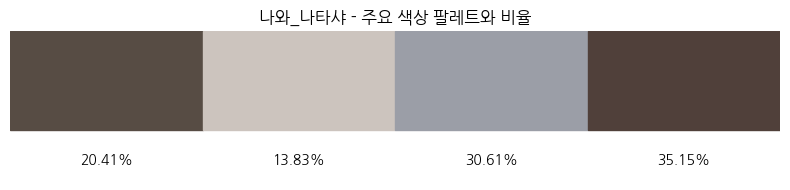

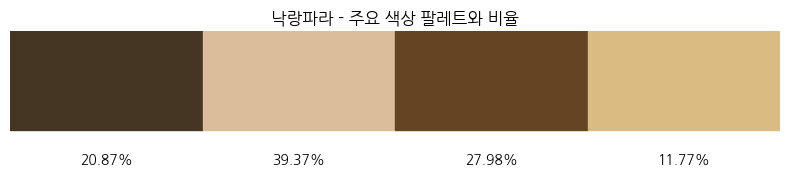

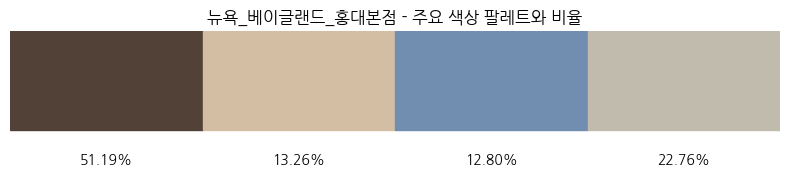

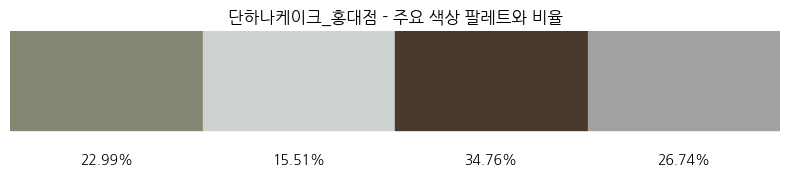

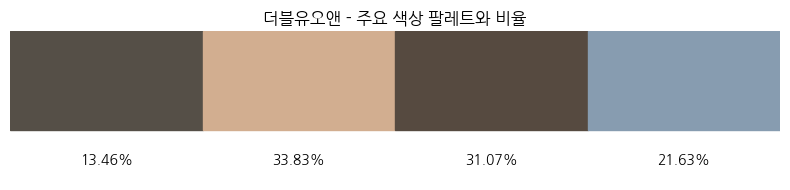

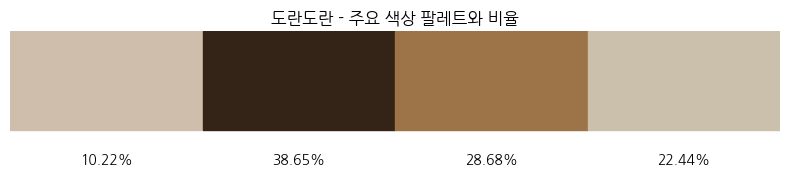

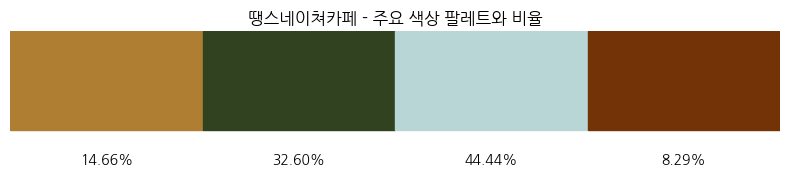

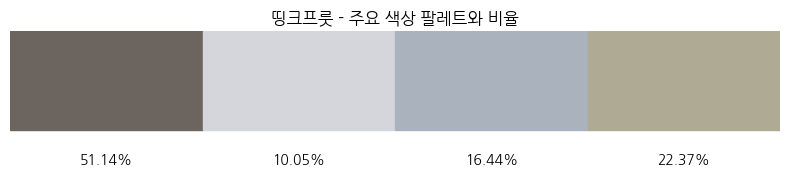

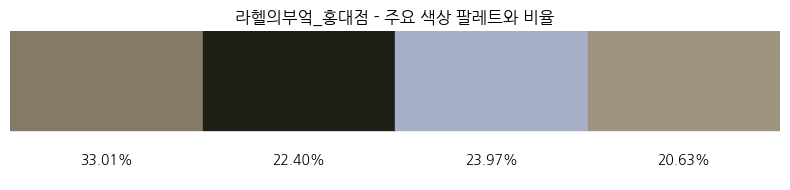

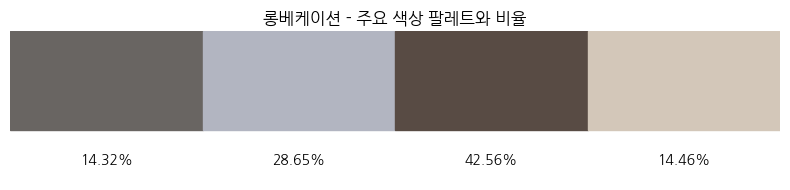

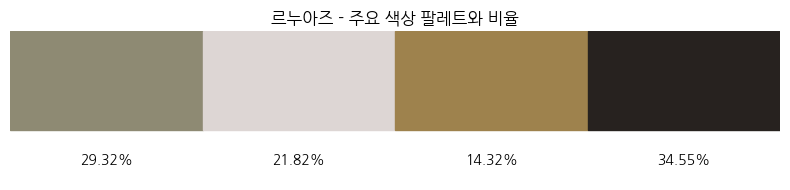

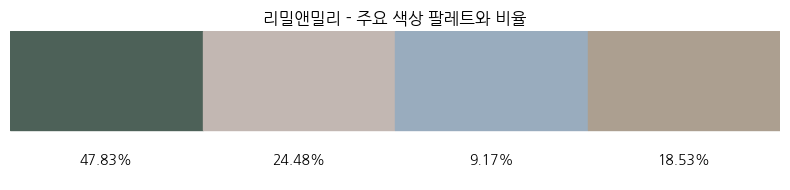

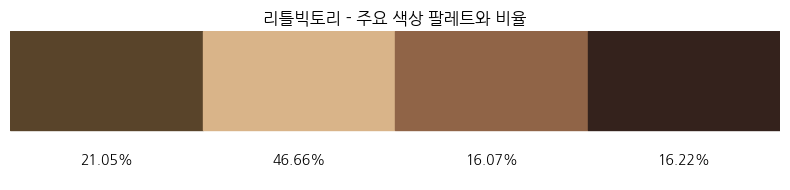

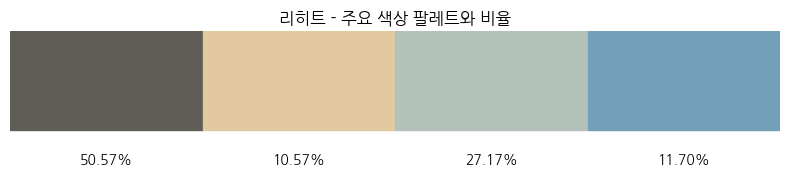

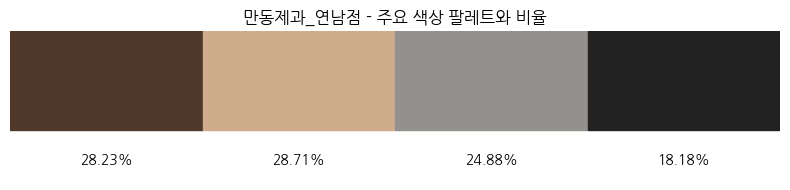

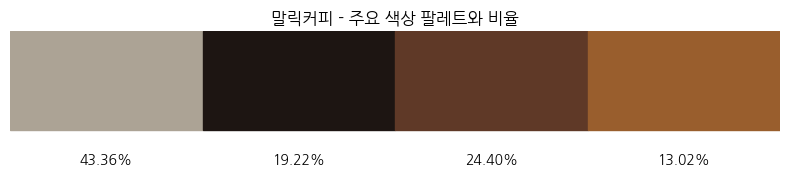

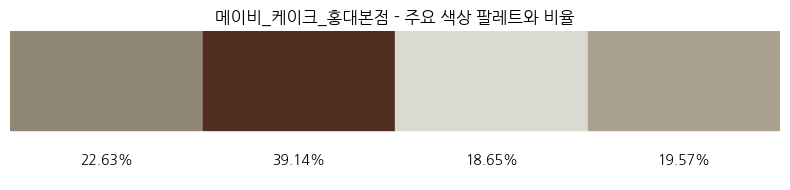

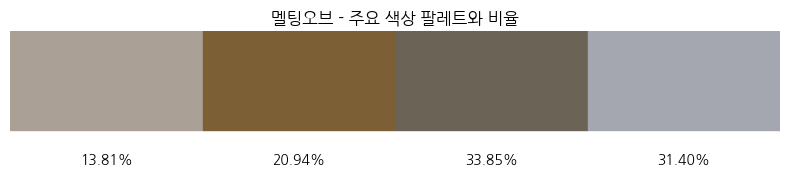

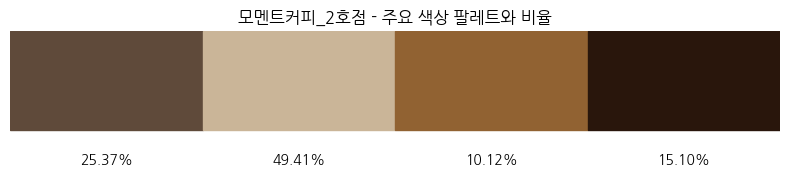

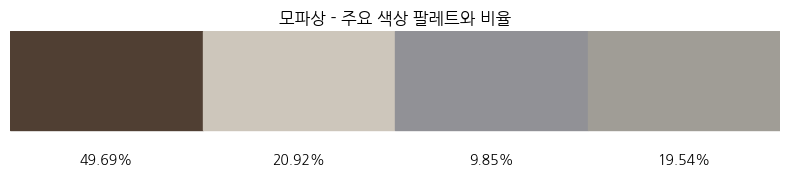

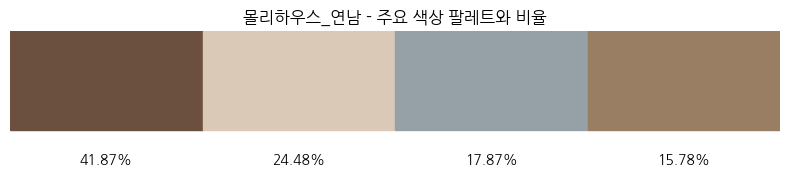

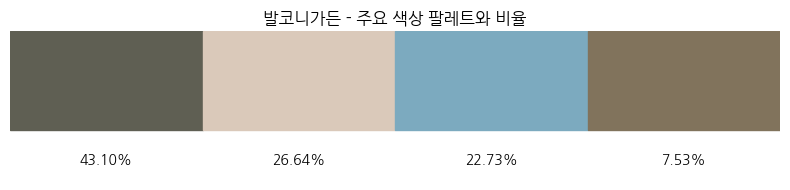

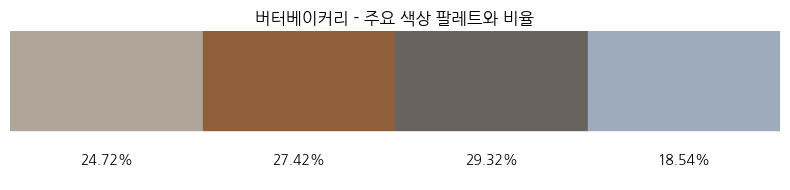

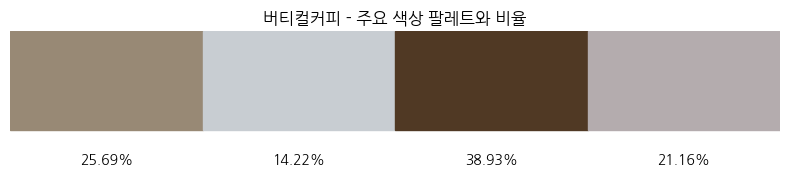

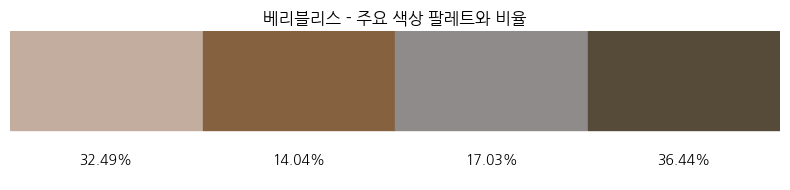

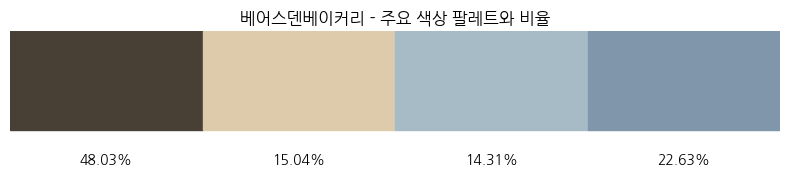

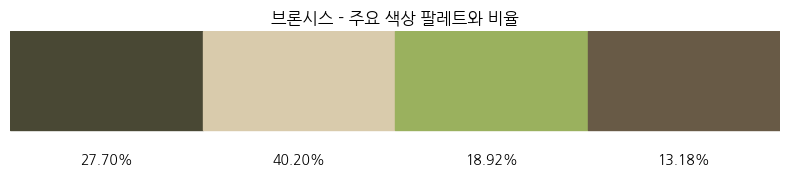

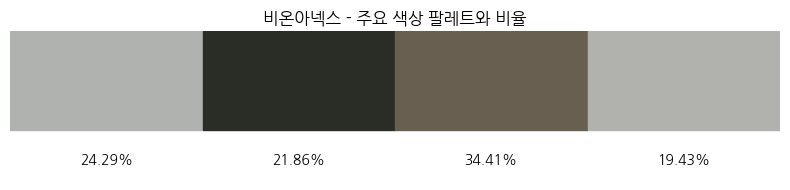

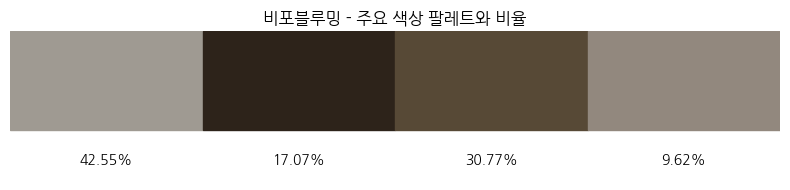

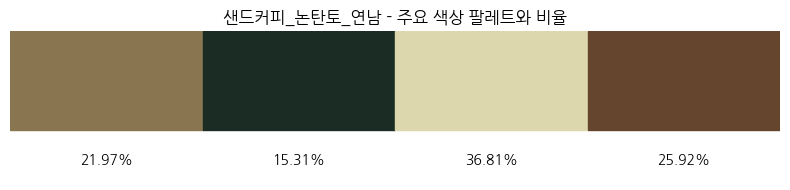

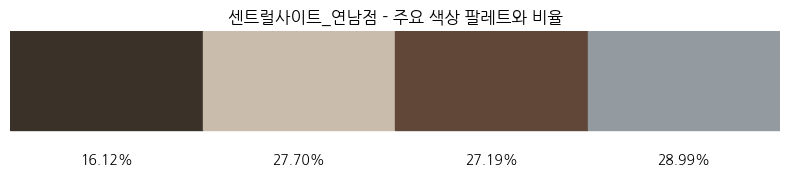

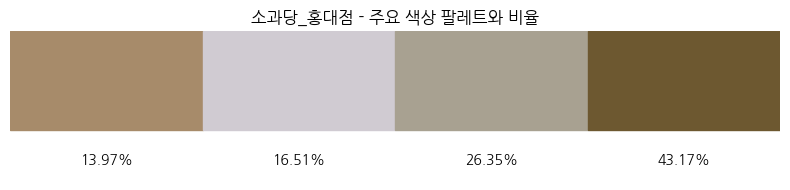

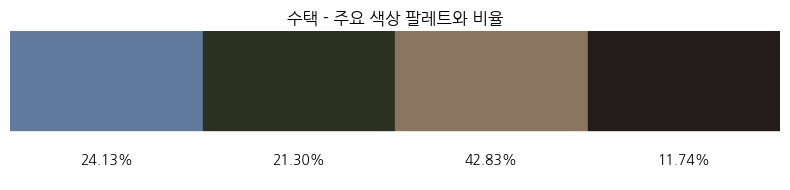

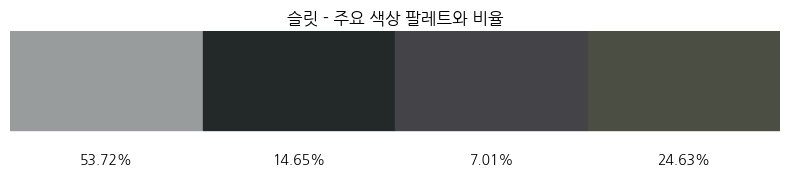

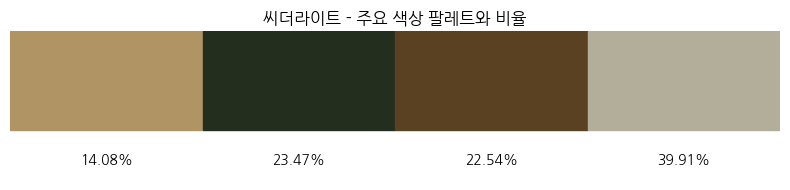

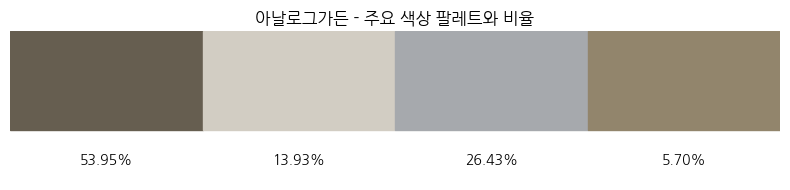

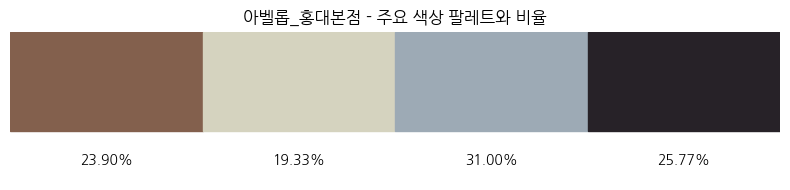

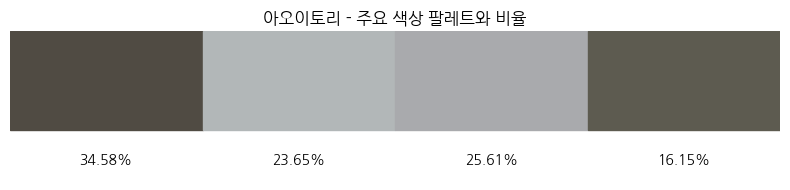

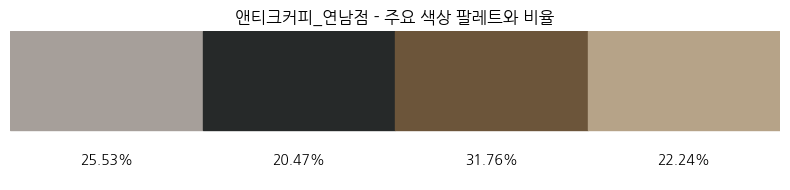

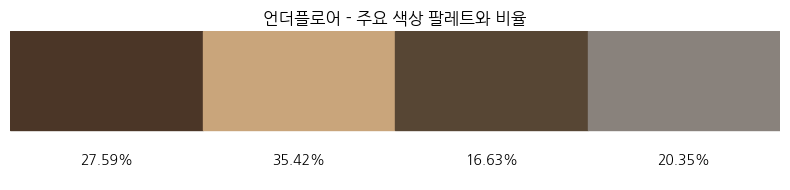

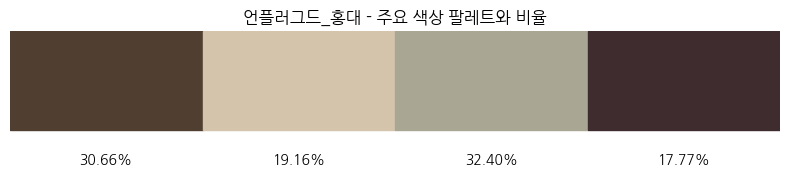

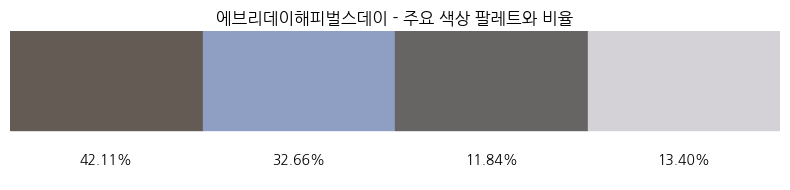

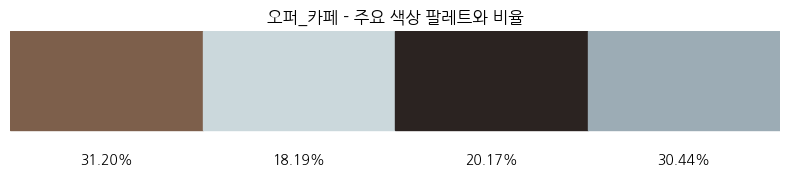

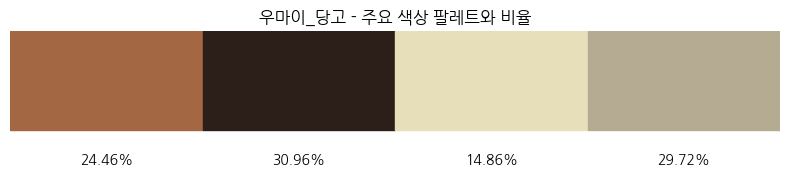

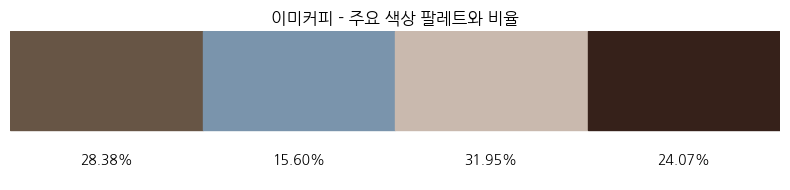

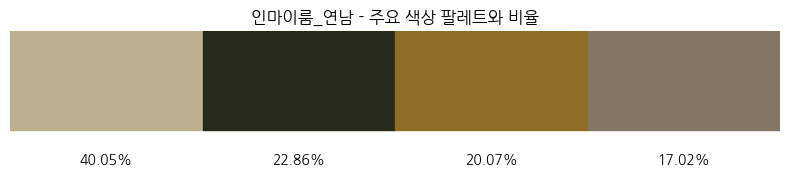

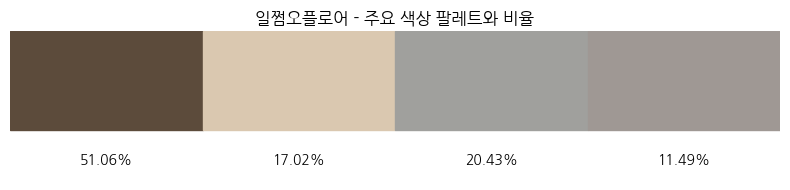

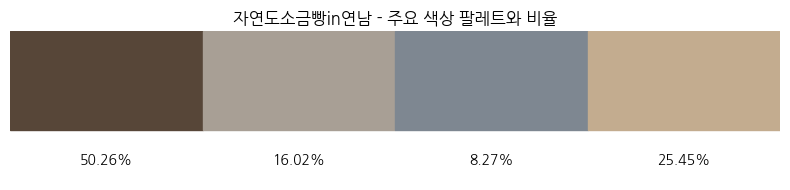

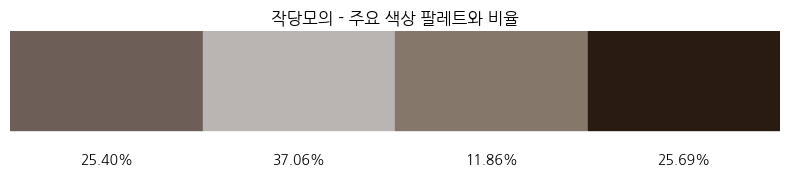

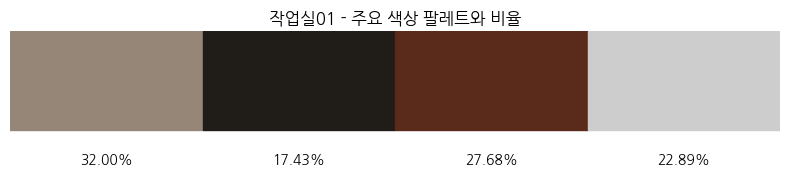

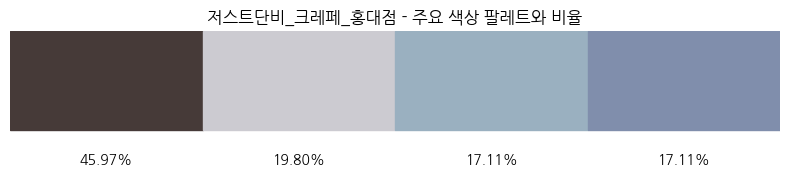

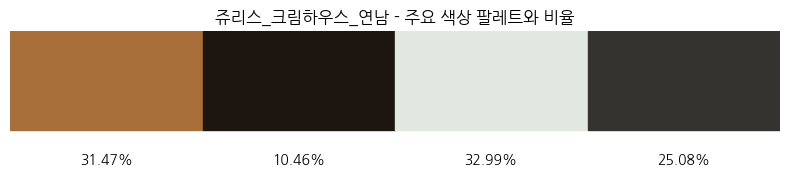

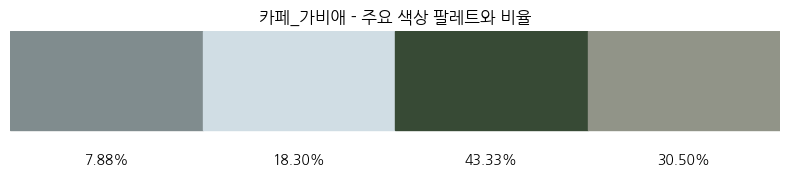

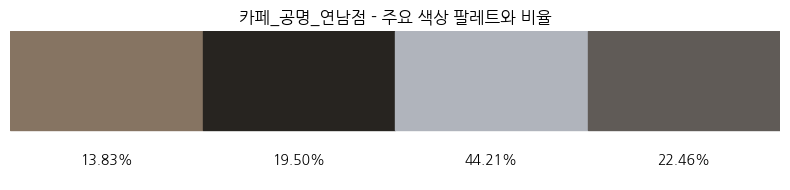

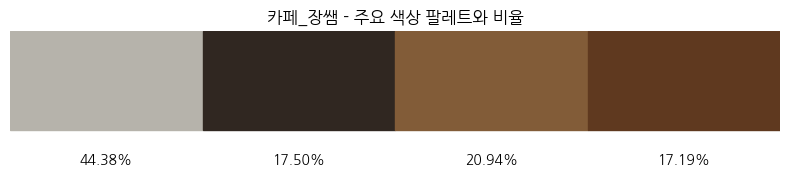

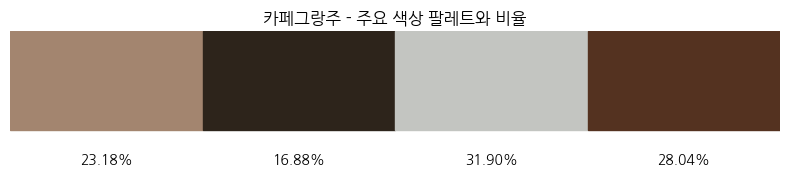

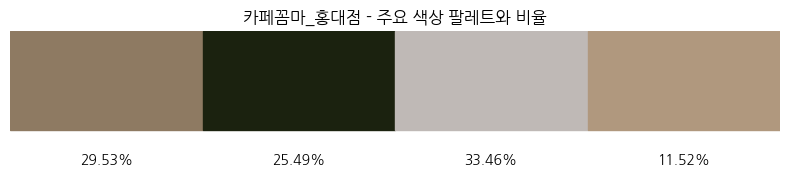

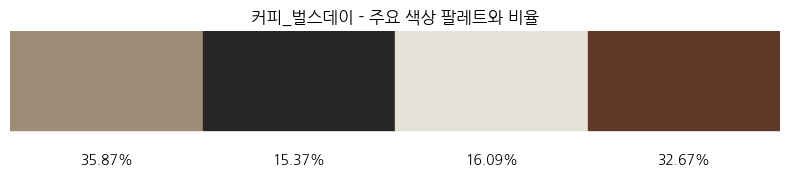

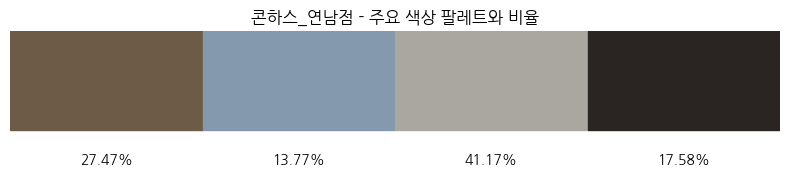

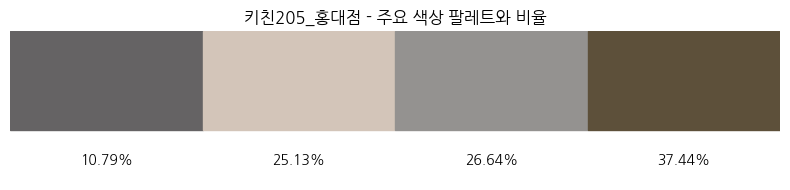

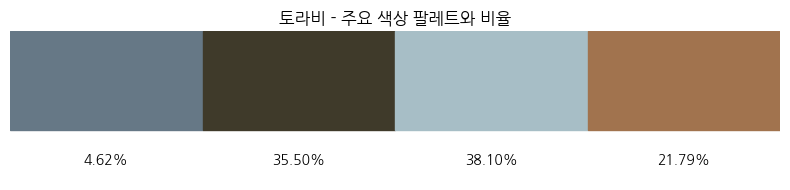

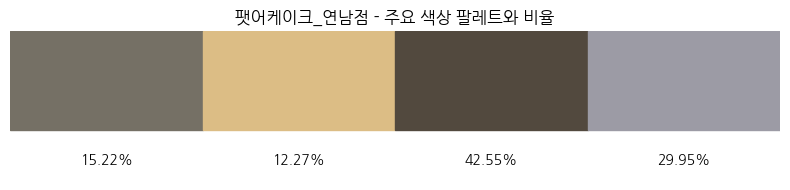

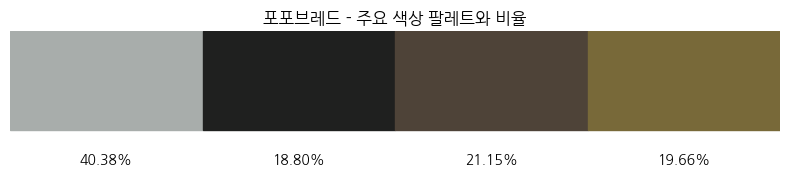

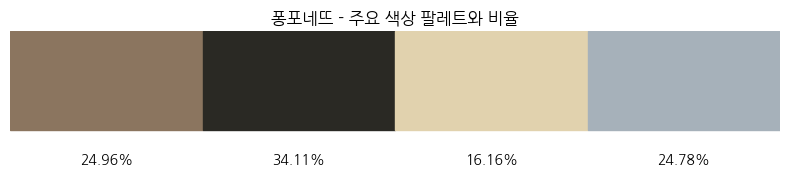

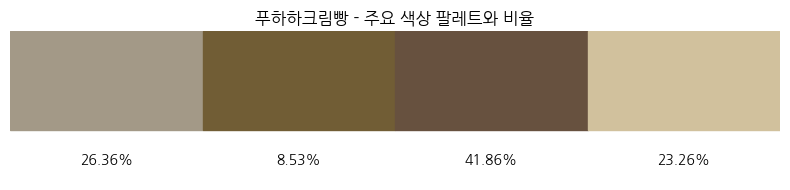

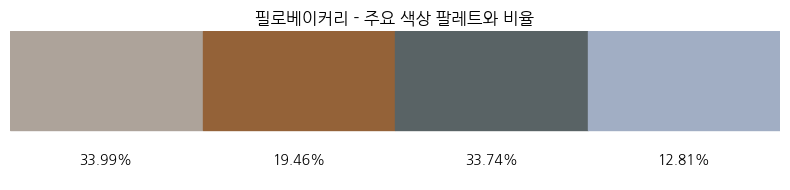

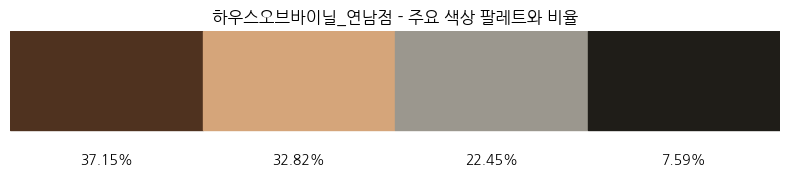

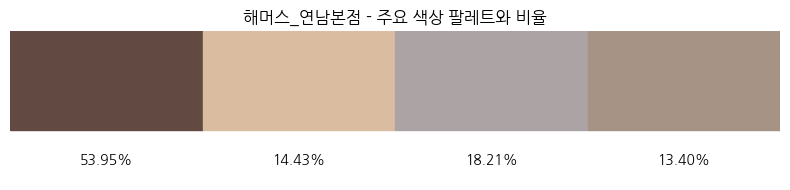

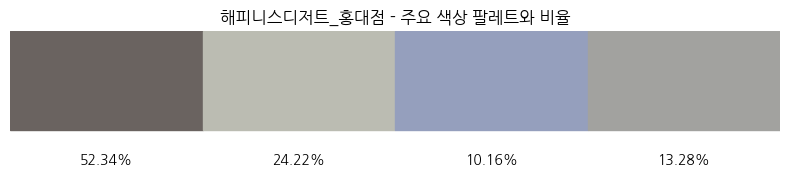

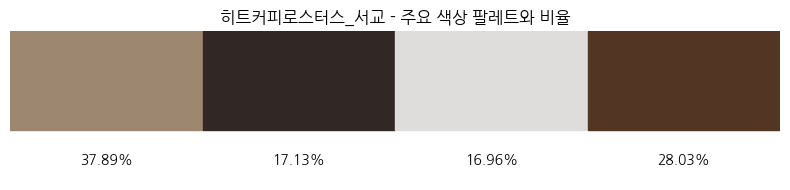

In [ ]:
# merged_df 데이터프레임을 여기에 대입
process_cafes(merged_df)

In [ ]:
import re
import pandas as pd

# 주요 색상과 비율 계산 함수
def calculate_color_ratios_with_tolerance(palette, colors):
    tree = KDTree(palette)
    _, indices = tree.query(colors)
    counter = Counter(indices)
    total_colors = len(colors)
    ratios = {tuple(palette[i]): count / total_colors for i, count in counter.items()}
    return ratios

def process_cafes_and_save(merged_df, output_csv_path):
    result_data = []

    for idx, row in merged_df.iterrows():
        cafe_name = row['Cafe Name']
        raw_colors = row['Colors']

        # Colors 데이터를 안전하게 파싱하기 위해 정규식을 사용
        color_matches = re.findall(r'\(\s*\d+\s*,\s*\d+\s*,\s*\d+\s*\)', raw_colors)
        colors = [tuple(map(int, re.findall(r'\d+', color))) for color in color_matches]

        # 주요 색상 4개 추출
        palette = colors[:4] if len(colors) >= 4 else colors

        # 결과 데이터에 추가
        result_data.append({
            "Cafe Name": cafe_name,
            "Color 1": palette[0] if len(palette) > 0 else None,
            "Color 2": palette[1] if len(palette) > 1 else None,
            "Color 3": palette[2] if len(palette) > 2 else None,
            "Color 4": palette[3] if len(palette) > 3 else None,
        })

    # 결과를 데이터프레임으로 변환
    result_df = pd.DataFrame(result_data)

    # CSV 파일로 저장
    result_df.to_csv(output_csv_path, index=False, encoding='utf-8-sig')

    print(f"CSV 파일로 저장 완료: {output_csv_path}")

# 사용 예시
output_csv_path = '/content/cafe_colors.csv'
process_cafes_and_save(merged_df, output_csv_path)


CSV 파일로 저장 완료: /content/cafe_colors.csv


In [ ]:
import pandas as pd

# CSV 파일 읽기
data = pd.read_csv('/content/cafe_pick_4colors.csv')

In [ ]:
data

,Cafe Name,Color 1,Color 2,Color 3,Color 4
0,17도씨,"(151, 115, 90)","(24, 19, 17)","(224, 209, 187)","(191, 182, 175)"
1,1984,"(177, 172, 168)","(39, 44, 47)","(86, 60, 50)","(133, 93, 67)"
2,943_킹스크로스CAFE,"(83, 65, 51)","(163, 156, 116)","(84, 74, 56)","(215, 198, 178)"
3,공미학_마포홍대점,"(140, 122, 113)","(41, 35, 33)","(184, 182, 192)","(180, 170, 156)"
4,공상온도,"(107, 88, 74)","(181, 186, 179)","(146, 161, 184)","(105, 89, 78)"
...,...,...,...,...,...
70,필로베이커리,"(173, 163, 154)","(148, 98, 56)","(89, 99, 101)","(161, 174, 196)"
71,하우스오브바이닐_연남점,"(79, 50, 31)","(213, 165, 122)","(155, 151, 142)","(31, 29, 24)"
72,해머스_연남본점,"(98, 74, 66)","(218, 189, 160)","(172, 164, 164)","(167, 147, 133)"
73,해피니스디저트_홍대점,"(106, 99, 96)","(187, 188, 178)","(149, 159, 189)","(162, 162, 159)"
